# Dropout and Batch Normalization

In this notebook we will implement Dropout and Batch Normalization. Batch Normalization both improves generalization and training speed. Dropout is considered to be a regularization technique.

References:
* "Dropout: A Simple Way to Prevent Neural Networks from Overfitting": https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

* "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift": https://arxiv.org/abs/1502.03167

# Setup

In [ ]:
%load_ext autoreload
%autoreload 
%matplotlib inline

import json
import matplotlib as mpl
from src import fmnist_utils
from src.fmnist_utils import *

import torch
from torch.autograd.function import InplaceFunction
from torch.autograd import Variable
from itertools import repeat
from torch import nn
from torch import optim

In [20]:
def plot(H):
    plt.title(max(H['test_acc']))
    plt.plot(H['acc'], label="acc")
    plt.plot(H['test_acc'], label="test_acc")
    plt.legend()

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['figure.figsize'] = (7, 7)
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12

(x_train, y_train), (x_test, y_test) = fmnist_utils.get_data(which="mnist")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Whiteboard exercises

* (0.5) Write equations for training and inference phase of Dropout
* (0.5) Write equations for training and inference phase of Batch Normalization
* (1.0) Explain inference mode of Dropout (see https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)

# Dropout

Note: We use MNIST to be able to quickly and in a stable way fit data, which makes it a good target for studying generalization.

In [32]:
class GaussianDropout(nn.Module):
    def __init__(self, alpha=1.0):
        super(GaussianDropout, self).__init__()
        self.alpha = torch.Tensor([alpha])
        
    def forward(self, x):
        """
        Sample noise   e ~ N(1, alpha)
        Multiply noise h = h_ * e
        """
        if self.train():
            epsilon = ??

            epsilon = Variable(epsilon)
            if x.is_cuda:
                epsilon = epsilon.cuda()

            return x * epsilon
        else:
            # Warning: You cannot just return x! Returning just "x" won't be accepted
            return ??

SyntaxError: invalid syntax (<ipython-input-32-7dc67f7ddcac>, line 12)

In [ ]:
class GaussianDropout(nn.Module):
    def __init__(self, alpha=1.0):
        super(GaussianDropout, self).__init__()
        self.alpha = torch.Tensor([alpha])
        
    def forward(self, x):
        """
        Sample noise   e ~ N(1, alpha)
        Multiply noise h = h_ * e
        """
        if self.train():
            epsilon = torch.randn(x.size()) * self.alpha + 1

            epsilon = Variable(epsilon)
            if x.is_cuda:
                epsilon = epsilon.cuda()

            return x * epsilon
        else:
            # Warning: You have to use the adjustment
            return x 

In [128]:
class BernoulliDropout(nn.Module):
    def __init__(self, alpha=1.0):
        super(BernoulliDropout, self).__init__()
        self.alpha = torch.Tensor([alpha])
        
    def forward(self, x):
        """
        Sample noise e ~ B(alpha)
        Multiply noise h = h_ * e
        """
        if self.train():
            if self.alpha[0] > 0:
                epsilon =  (torch.rand(x.size()) >= self.alpha[0]).type(torch.FloatTensor)

                epsilon = Variable(epsilon)
                if x.is_cuda:
                    epsilon = epsilon.cuda()

                return x * epsilon / (1 - self.alpha[0])
            else:
                return x
        else:
            # Warning: You have to use the adjustment
            return x 

## Exercise 1: Implement and show better generalization of Dropout

In [139]:
input_dim = 784
output_dim = 10
alpha = 0.05
hidden_dims =  [50, 50, 50]
model = torch.nn.Sequential()
previous_dim = input_dim
for id, D in enumerate(hidden_dims):
    model.add_module("dropout_{}".format(id), BernoulliDropout(alpha))
    model.add_module("linear_{}".format(id), torch.nn.Linear(previous_dim, D, bias=True))
    model.add_module("nonlinearity_{}".format(id), torch.nn.ReLU())
    previous_dim = D
model.add_module("final_layer", torch.nn.Linear(D, output_dim, bias=True))

In [125]:
## Assert na inference
## Assert na lepsza generalizacje

In [140]:
loss = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
H = train(loss=loss, model=model, x_train=x_train, y_train=y_train,
          x_test=x_test, y_test=y_test,
          optim=optimizer, batch_size=128, n_epochs=100)

100%|██████████| 100/100 [00:14<00:00,  7.09it/s]


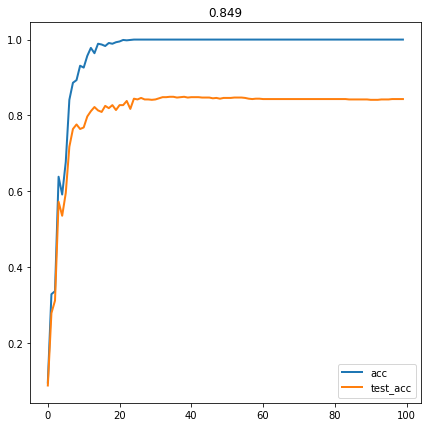

In [127]:
plot(H)

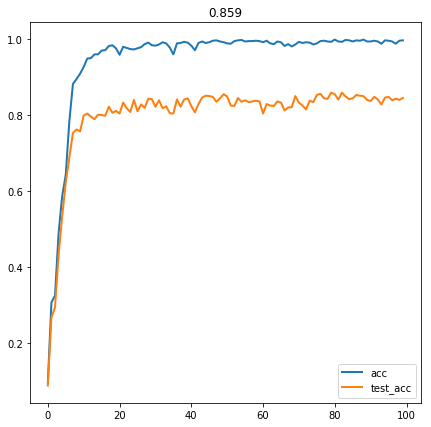

In [141]:
plot(H)

# Batch Normalization

## Exercise 2: Implement Batch Normalization

In [ ]:
## Assert na wieksze mozliwe LR

## Exercise 3: Does it really reduce internal drift?

Produce an experiment similar to Figure 1 in https://arxiv.org/pdf/1502.03167.pdf (you can use our data and neural network). Result is just a figure, save it to 8_3.png.

In [60]:
plt.savefig("8_3.png")